In [4]:
import pandas as pd

df = pd.read_csv('troop_movements.csv')

print(df.head())

             timestamp  unit_id unit_type empire_or_resistance  location_x  \
0  2025-07-08 16:25:07        1     at-at           resistance           3   
1  2025-07-08 16:25:06        2     at-at           resistance           5   
2  2025-07-08 16:25:05        3   unknown               empire           1   
3  2025-07-08 16:25:04        4     at-st           resistance           5   
4  2025-07-08 16:25:03        5   unknown           resistance           9   

   location_y  destination_x  destination_y homeworld  
0           4              5              4   Dagobah  
1           3             10              1    Mirial  
2           5              9             10   Tholoth  
3           3              4              6   Iktotch  
4           3              8              7     Naboo  


In [5]:
#grouped data showing counts of empire vs resistance
print('empire count: ',df['empire_or_resistance'].str.contains('empire', case=False).sum())
print('resistance count: ',df['empire_or_resistance'].str.contains('resistance', case=False).sum())

empire count:  497
resistance count:  503


In [6]:
#grouped data showing counts of characters by homeworld
planets = df['homeworld'].unique()

for planet in planets:
    print(f'{planet}: ',df['homeworld'].str.contains(planet, case=False).sum())

Dagobah:  24
Mirial:  25
Tholoth:  28
Iktotch:  30
Naboo:  23
Toydaria:  28
Haruun Kal:  24
Eriadu:  28
Kashyyyk:  17
Rodia:  30
Bestine IV:  22
Concord Dawn:  25
Aleen Minor:  25
Mon Cala:  22
Stewjon:  20
Tund:  31
Umbara:  18
Dorin:  26
Glee Anselm:  24
Skako:  23
Quermia:  28
Serenno:  23
Sullust:  27
Muunilinst:  27
Champala:  22
Troiken:  22
Kalee:  20
Cerea:  24
Shili:  26
Chandrila:  18
Vulpter:  22
Malastare:  24
Alderaan:  24
Ojom:  30
Iridonia:  28
Trandosha:  24
Ryloth:  14
Socorro:  24
Tatooine:  23
Dathomir:  16
Zolan:  20
Corellia:  21


In [7]:
#counts of characters by unit type
unit_types = df['unit_type'].unique()

for type in unit_types:
    print(f'{type}: ',df['unit_type'].str.contains(type, case=False).sum())

at-at:  130
unknown:  119
at-st:  105
stormtrooper:  120
tie_silencer:  129
x-wing:  131
resistance_soldier:  126
tie_fighter:  140


In [8]:
#NEW FEATURE: is_resistance, Bool based on empire_or_resistance

df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
print(df['is_resistance'].head(),'\n', df['empire_or_resistance'].head())

0     True
1     True
2    False
3     True
4     True
Name: is_resistance, dtype: bool 
 0    resistance
1    resistance
2        empire
3    resistance
4    resistance
Name: empire_or_resistance, dtype: object


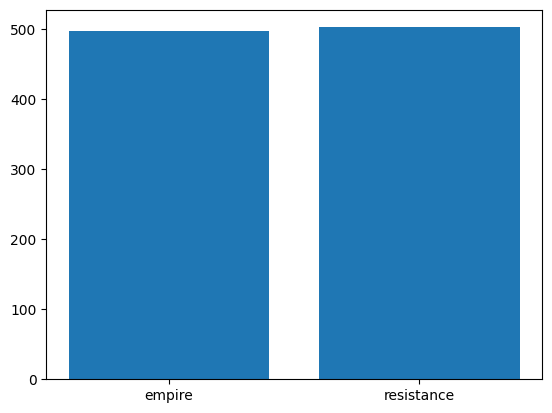

In [9]:
#empire vs resistance bar plot
import matplotlib.pyplot as plt

plt.bar(['empire','resistance'],[df['empire_or_resistance'].str.contains('empire', case=False).sum(),df['empire_or_resistance'].str.contains('resistance', case=False).sum()])
plt.show()

In [10]:
#create prediction model using sklearn.tree.DecisionTreeClassifier to predict empir or resistance based on homeworld and unit type
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#convert categorical features to numeric using pd.get_dummies
features = pd.get_dummies(df[['homeworld', 'unit_type']])
target = df['is_resistance']

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Patal\AppData\Local\Temp\ipykernel_18036\259541068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(50), x='Importance', y='Feature', palette="viridis")


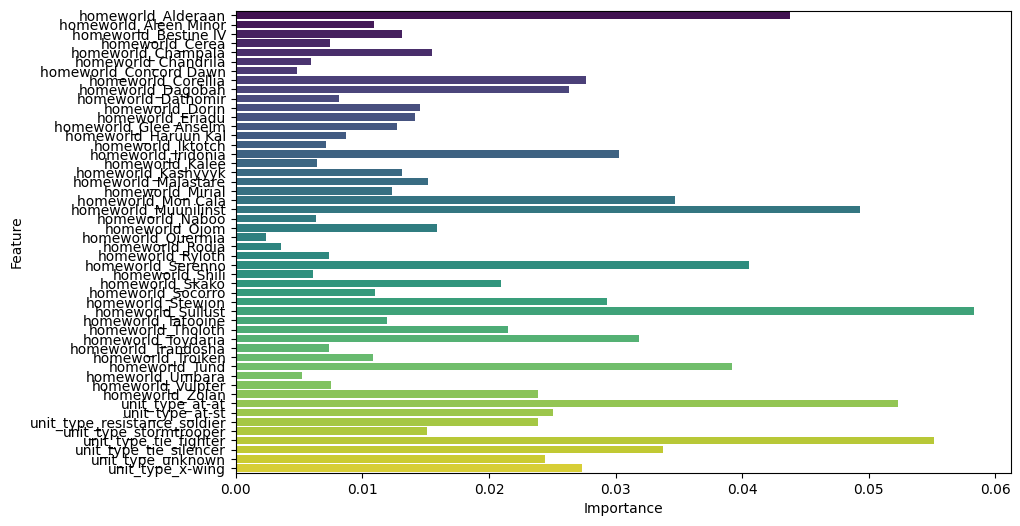

In [11]:
import seaborn as sns

#create a bar plot that shows feature importance
importances = model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
})

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(50), x='Importance', y='Feature', palette="viridis")
plt.show()

In [12]:
import pickle
#save model as pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)